In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(14,9)})
sns.set(rc={'grid.alpha':0.75})
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [3]:
path_notebook = os.path.abspath('data_exploration_1.ipynb')
dirname = os.path.dirname(path_notebook)

# Reading Data Into DataFrames

In [5]:
# 13th & Walnut START DATE: 7/25/2014 - Friday
df_13th_walnut = pd.read_csv(os.path.join(dirname, '../data_cleaned/thirtienth_walnut.csv'))
df_13th_walnut['date'] = pd.to_datetime(df_13th_walnut['date'])

# Colorado & 30th START DATE: 8/1/2017 - Tuesday
df_colorado_30th = pd.read_csv(os.path.join(dirname, '../data_cleaned/colorado_thirtieth.csv'))

df_colorado_30th.drop(columns=['eb_pedestrains', 'wb_pedestrians',], inplace=True) # Drop Pedestrian data for now
df_colorado_30th['date'] = pd.to_datetime(df_colorado_30th['date'])

# Folsom & BoulderCreek Path START DATE: 8/9/2011 - Friday
df_folsom_bouldercreek = pd.read_csv(os.path.join(dirname, '../data_cleaned/folsom_bouldercreek.csv'))
df_folsom_bouldercreek['date'] = pd.to_datetime(df_folsom_bouldercreek['date'])

# Folsom & South St. START DATE: 7/20/2015 - Monday
df_folsom_south = pd.read_csv(os.path.join(dirname, '../data_cleaned/folsom_south.csv'))
df_folsom_south['date'] = pd.to_datetime(df_folsom_south['date'])

# Folsom & Pine START DATE: 7/20/2015 - Monday
df_folsom_pine = pd.read_csv(os.path.join(dirname, '../data_cleaned/folsom_pine.csv'))
df_folsom_pine['date'] = pd.to_datetime(df_folsom_pine['date'])

# Baseline & Inca START DATE: 3/3/2016 - Thursday
df_baseline_inca = pd.read_csv(os.path.join(dirname, '../data_cleaned/baseline_inca.csv'))
df_baseline_inca['date'] = pd.to_datetime(df_baseline_inca['date'])


## Uncomment to view table structures
# print('13th & Walnut')
# print(df_13th_walnut)
# print('Colorado & 30th')
# print(df_colorado_30th)
# print('Folsom & Boulder Creek Path')
# print(df_folsom_bouldercreek)
# print('Folsom & South St.')
# print(df_folsom_south)
# print('Folsom & Pine')
# print(df_folsom_pine)
# print('Baseline & Inca')
# print(df_baseline_inca)

In [7]:
# Weather Data START DATE: 1/1/2011 - Saturday
df_weather = pd.read_csv(os.path.join(dirname, '../data_cleaned/weather_daily.csv'))
df_weather['date'] = pd.to_datetime(df_weather['date'])

# -998 is used to represent missing data
df_weather = df_weather[(df_weather.tmin != -998) | (df_weather.tmax != -998)]


## Uncomment to view table structure
# print('Weather Data')
# print(df_weather)

# Slicing/Grouping Dataframes

Group 15 minute intervals into daily, weekly, and monthly counts as desired.

In [8]:
def reset_index(df):
    df = df.reset_index()
    return(df)

##########
# days_13th_walnut = df_13th_walnut.groupby(pd.Grouper(key='date', freq='d'))['total'].sum()
# weeks_13th_walnut = df_13th_walnut.groupby(pd.Grouper(key='date', freq='7d'))['total'].sum()
months_13th_walnut = df_13th_walnut.groupby(pd.Grouper(key='date', freq='M'))['total'].sum()

# Reset index from date
# days_13th_walnut = reset_index(days_13th_walnut)
# weeks_13th_walnut = reset_index(weeks_13th_walnut)
months_13th_walnut = reset_index(months_13th_walnut)
##########
# days_colorado_30th = df_colorado_30th.groupby(pd.Grouper(key='date', freq='d'))['total'].sum()
# weeks_colorado_30th = df_colorado_30th.groupby(pd.Grouper(key='date', freq='7d'))['total'].sum()
months_colorado_30th = df_colorado_30th.groupby(pd.Grouper(key='date', freq='M'))['total'].sum()

# days_colorado_30th = reset_index(days_colorado_30th)
# weeks_colorado_30th = reset_index(weeks_colorado_30th)
months_colorado_30th = reset_index(months_colorado_30th)
##########
days_folsom_bouldercreek = df_folsom_bouldercreek.groupby(pd.Grouper(key='date', freq='d'))['total'].sum()
# weeks_folsom_bouldercreek = df_folsom_bouldercreek.groupby(pd.Grouper(key='date', freq='7d'))['total'].sum()
months_folsom_bouldercreek = (df_folsom_bouldercreek.groupby(pd.Grouper(key='date', freq='M'))['total'].sum())

days_folsom_bouldercreek = reset_index(days_folsom_bouldercreek)
# weeks_folsom_bouldercreek = reset_index(weeks_folsom_bouldercreek)
months_folsom_bouldercreek = reset_index(months_folsom_bouldercreek)
##########
# days_folsom_south = df_folsom_south.groupby(pd.Grouper(key='date', freq='d'))['total'].sum()
# weeks_folsom_south = df_folsom_south.groupby(pd.Grouper(key='date', freq='7d'))['total'].sum()
months_folsom_south = df_folsom_south.groupby(pd.Grouper(key='date', freq='M'))['total'].sum()

# days_folsom_south = reset_index(days_folsom_south)
# weeks_folsom_south = reset_index(weeks_folsom_south)
months_folsom_south = reset_index(months_folsom_south)
##########
# days_folsom_pine = df_folsom_pine.groupby(pd.Grouper(key='date', freq='d'))['total'].sum()
# weeks_folsom_pine = df_folsom_pine.groupby(pd.Grouper(key='date', freq='7d'))['total'].sum()
months_folsom_pine = df_folsom_pine.groupby(pd.Grouper(key='date', freq='M'))['total'].sum()

# days_folsom_pine = reset_index(days_folsom_pine)
# weeks_folsom_pine = reset_index(weeks_folsom_pine)
months_folsom_pine = reset_index(months_folsom_pine)
##########
# days_baseline_inca = df_baseline_inca.groupby(pd.Grouper(key='date', freq='d'))['total'].sum()
# weeks_baseline_inca = df_baseline_inca.groupby(pd.Grouper(key='date', freq='7d'))['total'].sum()
months_baseline_inca = df_baseline_inca.groupby(pd.Grouper(key='date', freq='M'))['total'].sum()

# days_baseline_inca = reset_index(days_baseline_inca)
# weeks_baseline_inca = reset_index(weeks_baseline_inca)
months_baseline_inca = reset_index(months_baseline_inca)

##### Group/Mean Weather Data By Month

In [9]:
weather_months = df_weather.groupby(pd.Grouper(key='date', freq='M'))['tmin', 'tmax'].mean()
weather_months = reset_index(weather_months)

weather_months.columns = ['date', 'tmin_mean', 'tmax_mean']
# print(weather_months)

# Plotting

### Monthly Bike Count At All Intersections

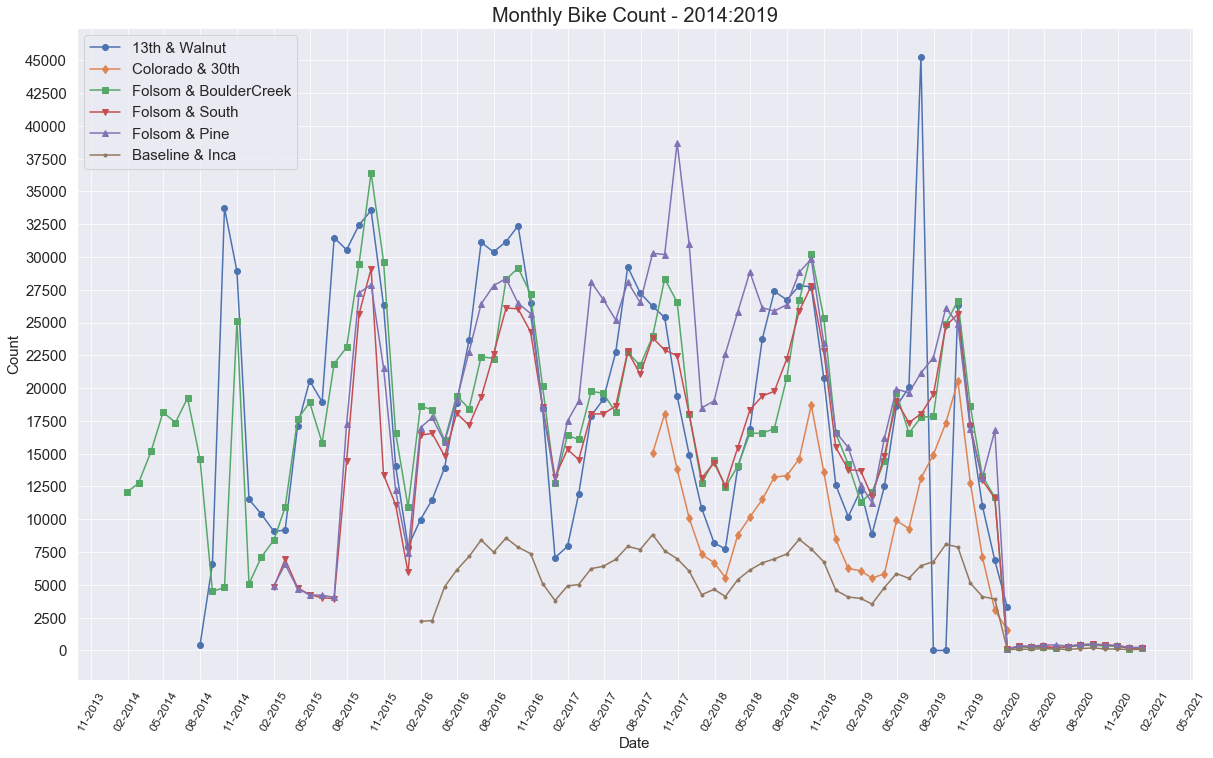

In [25]:
fig, ax = plt.subplots(figsize=(20, 12))

plt.yticks(np.arange(0, 50000, 2500))

ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('Monthly Bike Count - 2014:2019', fontsize=20)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

# Shortened Bouldercreek dataframe to match timeframe of other data
months_folsom_bouldercreek_short = months_folsom_bouldercreek.query('date.dt.year >= 2014')

plt.plot(months_13th_walnut['date'], months_13th_walnut['total'], label='13th & Walnut', marker='o')
plt.plot(months_colorado_30th['date'], months_colorado_30th['total'], label='Colorado & 30th', marker='d')
plt.plot(months_folsom_bouldercreek_short['date'], months_folsom_bouldercreek_short['total'], label='Folsom & BoulderCreek', marker='s')
plt.plot(months_folsom_south['date'], months_folsom_south['total'], label='Folsom & South', marker='v')
plt.plot(months_folsom_pine['date'], months_folsom_pine['total'], label='Folsom & Pine', marker='^')
plt.plot(months_baseline_inca['date'], months_baseline_inca['total'], label='Baseline & Inca', marker='.')


ax.set_xticks([])
ax.set_xticks([], minor=True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax.xaxis.grid(True, which="minor")
plt.xticks(rotation=60, fontsize = 12)

ax.legend(loc='upper left', prop={'size': 15})
plt.show()

### Daily Temperature High/Low and Mean Over 9 Years

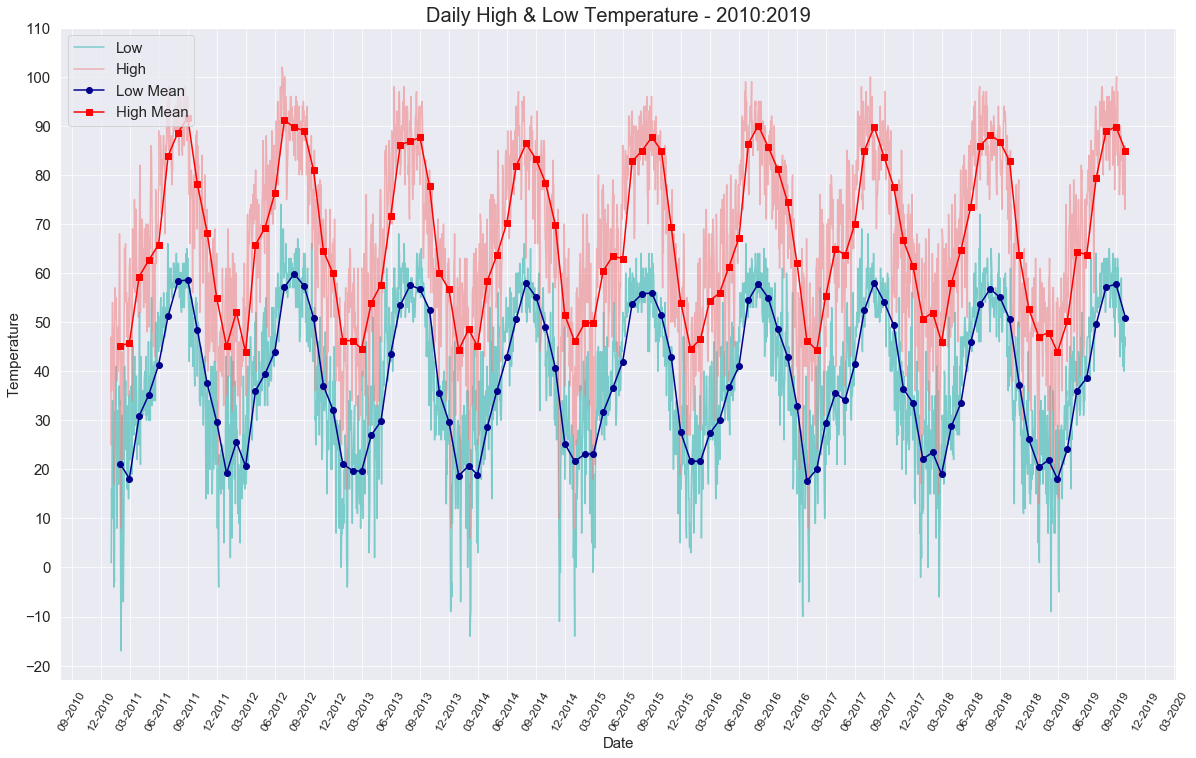

In [11]:
fig, ax = plt.subplots(figsize=(20, 12))

ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('Daily High & Low Temperature - 2010:2019', fontsize=20)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Temperature', fontsize=15)

# Daily Values
plt.plot(df_weather['date'], df_weather['tmin'], label='Low', color='lightseagreen', alpha=0.55)
plt.plot(df_weather['date'], df_weather['tmax'], label='High', color='lightcoral', alpha=0.55)

# Mean Monthly Values
plt.plot(weather_months['date'], weather_months['tmin_mean'], label='Low Mean', color='darkblue', marker='o')
plt.plot(weather_months['date'], weather_months['tmax_mean'], label='High Mean', color='red', marker='s')

plt.yticks(np.arange(-20, 120, 10))

ax.set_xticks([])
ax.set_xticks([], minor=True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax.xaxis.grid(True, which="minor")
plt.xticks(rotation=60, fontsize = 12)

ax.legend(loc='upper left', prop={'size': 15})

plt.show()

### Let's Combine The Two

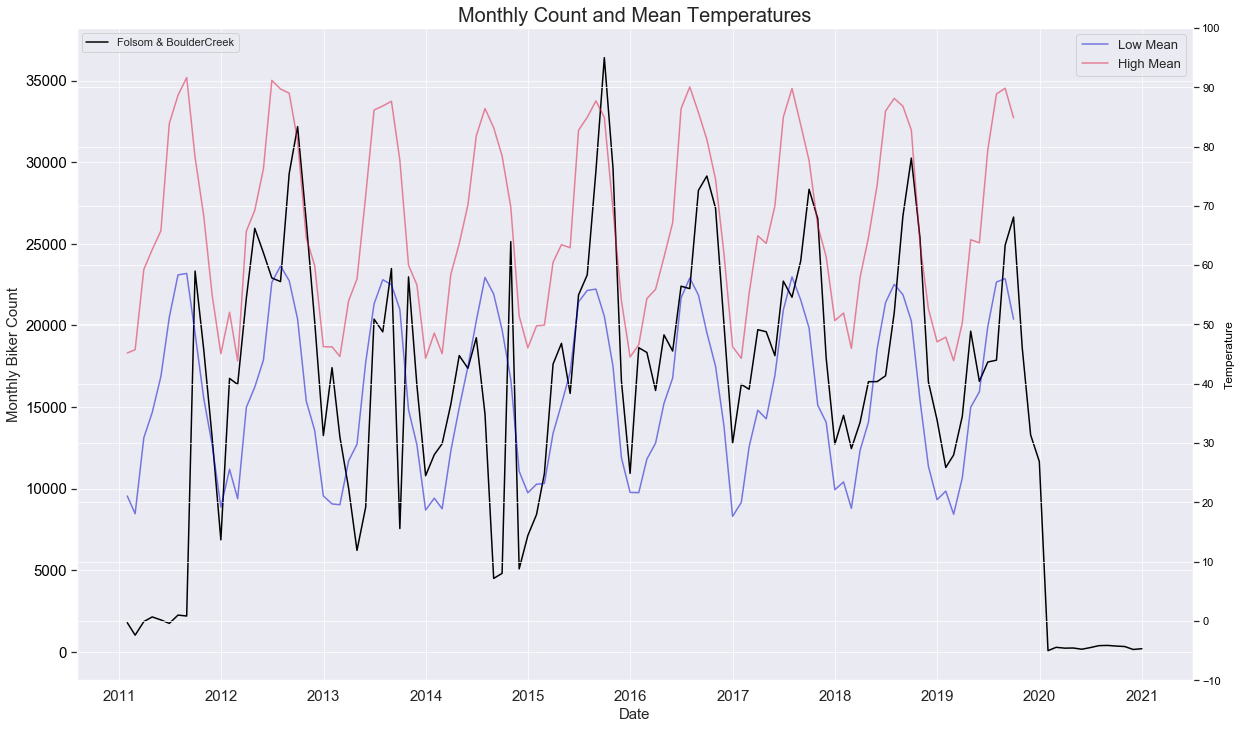

In [12]:
# Constants 
bike_color = 'black'

# General Graph Initiaztion and Labels
##############################
fig, ax1 = plt.subplots(figsize=(20, 12))

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Monthly Count and Mean Temperatures', fontsize=20)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Monthly Biker Count',fontsize=15)
##############################

# ax1.plot(months_13th_walnut['date'], months_13th_walnut['total'], label='13th & Walnut', color=bike_color)
# ax1.plot(months_colorado_30th['date'], months_colorado_30th['total'], label='Colorado & 30th', color=bike_color)
ax1.plot(months_folsom_bouldercreek['date'], months_folsom_bouldercreek['total'], label='Folsom & BoulderCreek', color=bike_color)
# ax1.plot(months_folsom_south['date'], months_folsom_south['total'], label='Folsom & South', color=bike_color)
# ax1.plot(months_folsom_pine['date'], months_folsom_pine['total'], label='Folsom & Pine', color=bike_color)
# ax1.plot(months_baseline_inca['date'], months_baseline_inca['total'], label='Baseline & Inca', color=bike_color)

##############################
ax1.tick_params(axis='y', labelcolor=bike_color)

ax2 = ax1.twinx()

ax2.set_ylabel('Temperature', color='black')

ax2.plot(weather_months['date'], weather_months['tmin_mean'], label='Low Mean', color='mediumblue', alpha=0.5)
ax2.plot(weather_months['date'], weather_months['tmax_mean'], label='High Mean', color='crimson', alpha=0.5)


ax2.tick_params(axis='y', labelcolor='black')

plt.yticks(np.arange(-10, 110, 10))

ax1.legend(loc='upper left', prop={'size': 11})
ax2.legend(loc='upper right', prop={'size': 13})

plt.show()

It appears there is a fairly consistant relation between temperature and biker turnout out, at least on a large scale. This will likely be useful for trying to predict biker presence given forcast temperatures.

### Monthly High/Low Mean Temperatures Compared Over 6 Years

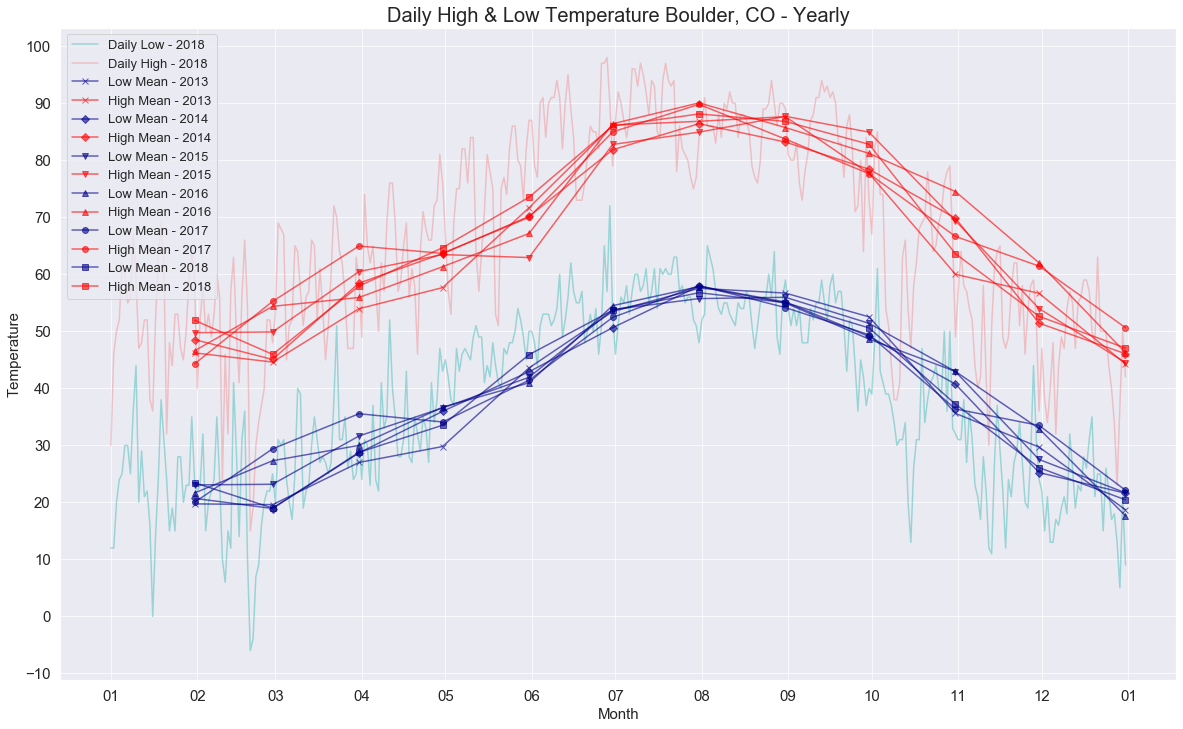

In [18]:
weather_months_2013 = weather_months.query('date.dt.year == 2013')
weather_months_2014 = weather_months.query('date.dt.year == 2014')
weather_months_2015 = weather_months.query('date.dt.year == 2015')
weather_months_2016 = weather_months.query('date.dt.year == 2016')
weather_months_2017 = weather_months.query('date.dt.year == 2017')
weather_2018 = df_weather.query('date.dt.year == 2018')
weather_months_2018 = weather_months.query('date.dt.year == 2018')

fig, ax = plt.subplots(figsize=(20, 12))

ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('Daily High & Low Temperature Boulder, CO - Yearly', fontsize=20)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Temperature', fontsize=15)

plt.plot(weather_2018['date'], weather_2018['tmin'], label='Daily Low - 2018', color='lightseagreen', alpha=.4)
plt.plot(weather_2018['date'], weather_2018['tmax'],  label='Daily High - 2018', color='lightcoral', alpha=.4)

plt.plot(weather_months_2018['date'], weather_months_2013['tmin_mean'], label='Low Mean - 2013', color='darkblue', marker='x', alpha=.6)
plt.plot(weather_months_2018['date'], weather_months_2013['tmax_mean'], label='High Mean - 2013', color='red', marker='x', alpha=.6)

plt.plot(weather_months_2018['date'], weather_months_2014['tmin_mean'], label='Low Mean - 2014', color='darkblue', marker='D', alpha=.6)
plt.plot(weather_months_2018['date'], weather_months_2014['tmax_mean'], label='High Mean - 2014', color='red', marker='D', alpha=.6)

plt.plot(weather_months_2018['date'], weather_months_2015['tmin_mean'], label='Low Mean - 2015', color='darkblue', marker='v', alpha=.6)
plt.plot(weather_months_2018['date'], weather_months_2015['tmax_mean'], label='High Mean - 2015', color='red', marker='v', alpha=.6)

plt.plot(weather_months_2018['date'], weather_months_2016['tmin_mean'], label='Low Mean - 2016', color='darkblue', marker='^', alpha=.6)
plt.plot(weather_months_2018['date'], weather_months_2016['tmax_mean'], label='High Mean - 2016', color='red', marker='^', alpha=.6)

plt.plot(weather_months_2018['date'], weather_months_2017['tmin_mean'], label='Low Mean - 2017', color='darkblue', marker='o', alpha=.6)
plt.plot(weather_months_2018['date'], weather_months_2017['tmax_mean'], label='High Mean - 2017', color='red', marker='o', alpha=.6)

plt.plot(weather_months_2018['date'], weather_months_2018['tmin_mean'], label='Low Mean - 2018', color='darkblue', marker='s', alpha=.6)
plt.plot(weather_months_2018['date'], weather_months_2018['tmax_mean'], label='High Mean - 2018', color='red', marker='s', alpha=.6)

plt.yticks(np.arange(-10, 110, 10))

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
ax.xaxis.grid(True, which="minor")

ax.legend(loc='upper left', prop={'size': 13})

plt.show()

The average monthly highs and lows appear to follow a reoccuring trend that is slightly negatively skewed. There is a steady build-up to summer months with a steeper descent into winter. Assuming biker activity is related to the weather, we should expect to see a similar trend within the biker count. For now I will focus on Folsom & BoulderCreek Path as it has the most activity out of all the intersections.

### Folsom & BoulderCreek Path Monthly Count

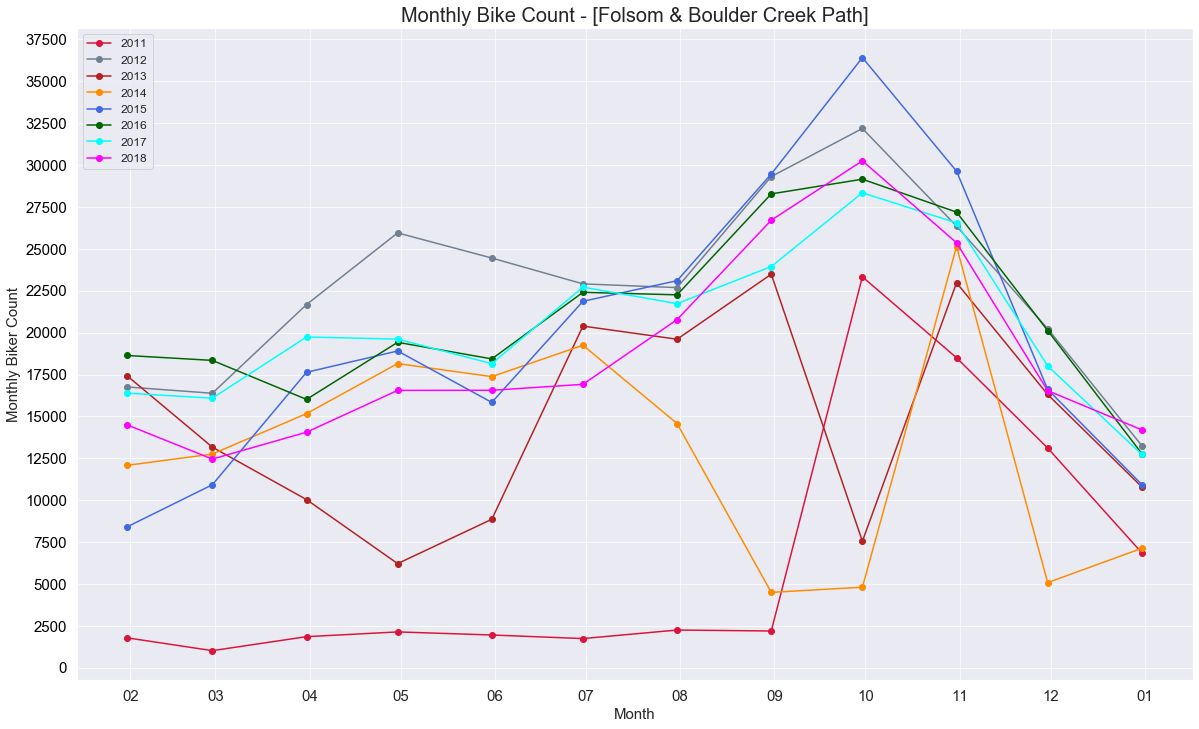

In [24]:
# Monthly bike count @ Folsom & Boulder Creek Path split up by years
months_folsom_bouldercreek_2011 = months_folsom_bouldercreek.query('date.dt.year == 2011')
months_folsom_bouldercreek_2012 = months_folsom_bouldercreek.query('date.dt.year == 2012')
months_folsom_bouldercreek_2013 = months_folsom_bouldercreek.query('date.dt.year == 2013')
months_folsom_bouldercreek_2014 = months_folsom_bouldercreek.query('date.dt.year == 2014')
months_folsom_bouldercreek_2015 = months_folsom_bouldercreek.query('date.dt.year == 2015')
months_folsom_bouldercreek_2016 = months_folsom_bouldercreek.query('date.dt.year == 2016')
months_folsom_bouldercreek_2017 = months_folsom_bouldercreek.query('date.dt.year == 2017')
months_folsom_bouldercreek_2018 = months_folsom_bouldercreek.query('date.dt.year == 2018')

# Constants for ease of customization
color_2011 = 'crimson'
color_2012 = 'slategray'
color_2013 = 'firebrick'
color_2014 = 'darkorange'
color_2015 = 'royalblue'
color_2016 = 'darkgreen'
color_2017 = 'cyan'
color_2018 = 'magenta'

temp_alpha = 0.4

# General Graph Initiaztion and Labels
##############################
fig, ax1 = plt.subplots(figsize=(20, 12))

plt.yticks(np.arange(0, 40000, 2500))

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Monthly Bike Count - [Folsom & Boulder Creek Path]', fontsize=20)
ax1.set_xlabel('Month', fontsize=15)
ax1.set_ylabel('Monthly Biker Count', fontsize=15)
##############################

# Biker data plots 2011-2018
# Plot on the 2018 'date' x-axis for consitancy and graph overlap
##############################
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2011['total'], color=color_2011, marker='o', label='2011')
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2012['total'], color=color_2012, marker='o', label='2012')
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2013['total'], color=color_2013, marker='o', label='2013')
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2014['total'], color=color_2014, marker='o', label='2014')
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2015['total'], color=color_2015, marker='o', label='2015')
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2016['total'], color=color_2016, marker='o', label='2016')
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2017['total'], color=color_2017, marker='o', label='2017')
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2018['total'], color=color_2018, marker='o', label='2018')
##############################

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m'))


ax1.legend(loc='upper left', prop={'size': 12})

plt.show()

With the exception of some outliers early in the recording data(Namely 2011, 2013, 2014), the biker count appears follow a trend similar to the yearly weather. This is to be expected since cycling is an outdoor activity. The Spike in early 2012 could be something interesting to look into.

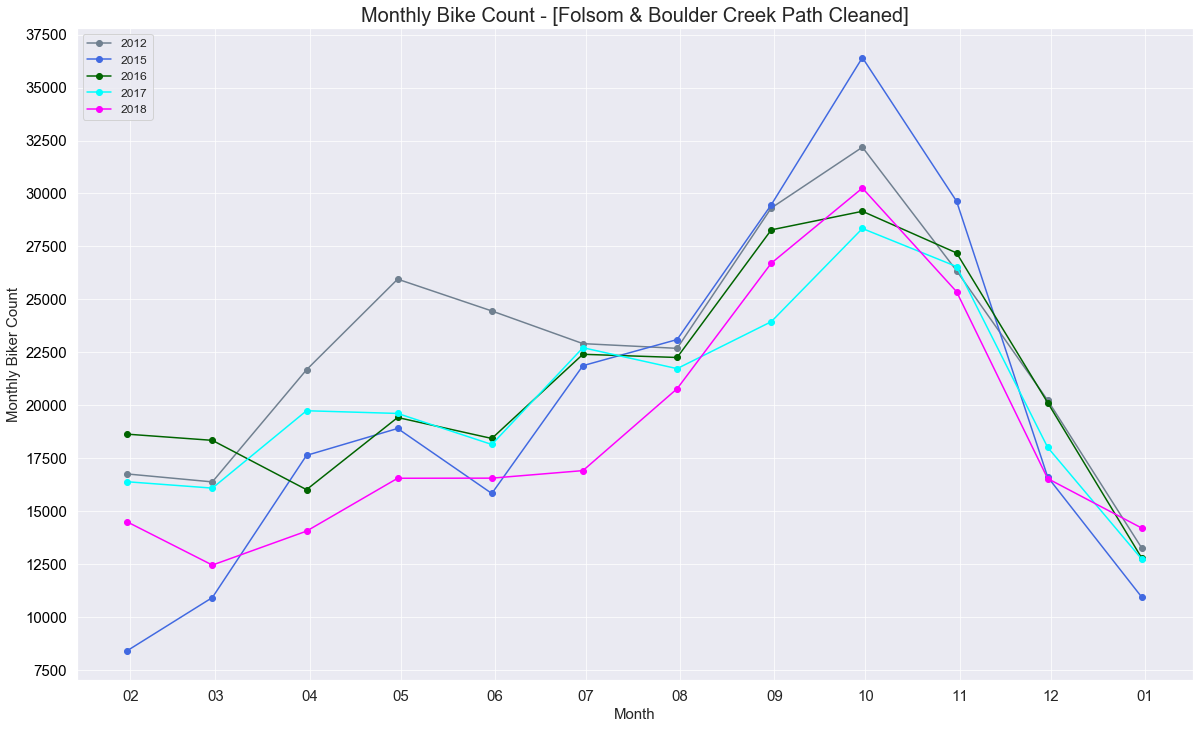

In [23]:
# Monthly bike count @ Folsom & Boulder Creek Path split up by years
months_folsom_bouldercreek_2012 = months_folsom_bouldercreek.query('date.dt.year == 2012')
months_folsom_bouldercreek_2015 = months_folsom_bouldercreek.query('date.dt.year == 2015')
months_folsom_bouldercreek_2016 = months_folsom_bouldercreek.query('date.dt.year == 2016')
months_folsom_bouldercreek_2017 = months_folsom_bouldercreek.query('date.dt.year == 2017')
months_folsom_bouldercreek_2018 = months_folsom_bouldercreek.query('date.dt.year == 2018')

# Constants for ease of customization
color_2011 = 'crimson'
color_2012 = 'slategray'
color_2013 = 'firebrick'
color_2014 = 'darkorange'
color_2015 = 'royalblue'
color_2016 = 'darkgreen'
color_2017 = 'cyan'
color_2018 = 'magenta'

temp_alpha = 0.4

# General Graph Initiaztion and Labels
##############################
fig, ax1 = plt.subplots(figsize=(20, 12))

plt.yticks(np.arange(0, 40000, 2500))

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Monthly Bike Count - [Folsom & Boulder Creek Path Cleaned]', fontsize=20)
ax1.set_xlabel('Month', fontsize=15)
ax1.set_ylabel('Monthly Biker Count', fontsize=15)
##############################

# Biker data plots 2011-2018
# Plot on the 2018 'date' x-axis for consitancy and graph overlap
##############################
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2012['total'], color=color_2012, marker='o', label='2012')
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2015['total'], color=color_2015, marker='o', label='2015')
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2016['total'], color=color_2016, marker='o', label='2016')
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2017['total'], color=color_2017, marker='o', label='2017')
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2018['total'], color=color_2018, marker='o', label='2018')
##############################

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m'))


ax1.legend(loc='upper left', prop={'size': 12})

plt.show()

### Folsom & BoulderCreek Path Bike Count Vs. Temperature

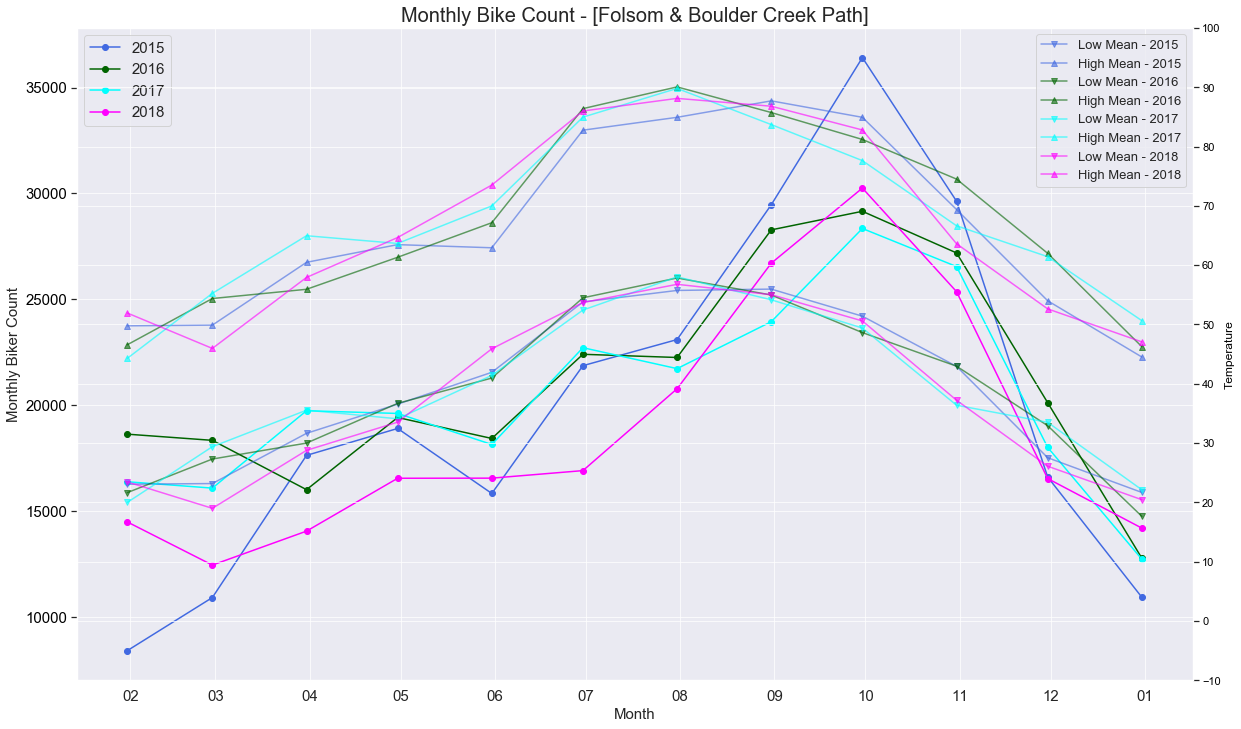

In [29]:
# General Graph Initiaztion and Labels
##############################
fig, ax1 = plt.subplots(figsize=(20, 12))

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Monthly Bike Count - [Folsom & Boulder Creek Path]', fontsize=20)
ax1.set_xlabel('Month', fontsize=15)
ax1.set_ylabel('Monthly Biker Count', fontsize=15)
##############################

# Biker data plots 2011-2018
# Plot on the 2018 'date' x-axis for consitancy and graph overlap
##############################
# ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2011['total'], color=color_2011, marker='o', label='2011')
# ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2012['total'], color=color_2012, marker='o', label='2012')
# ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2013['total'], color=color_2013, marker='o', label='2013')
# ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2014['total'], color=color_2014, marker='o', label='2014')
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2015['total'], color=color_2015, marker='o', label='2015')
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2016['total'], color=color_2016, marker='o', label='2016')
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2017['total'], color=color_2017, marker='o', label='2017')
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2018['total'], color=color_2018, marker='o', label='2018')
##############################

ax1.tick_params(axis='y', labelcolor=bike_color)

##########
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature', color='black')

# ax2.plot(weather_months_2018['date'], weather_months_2013['tmin_mean'], label='Low Mean - 2013', color=color_2013, marker='v', alpha=.6)
# ax2.plot(weather_months_2018['date'], weather_months_2013['tmax_mean'], label='High Mean - 2013', color=color_2013, marker='^', alpha=.6)

# ax2.plot(weather_months_2018['date'], weather_months_2014['tmin_mean'], label='Low Mean - 2014', color=color_2014, marker='v', alpha=.6)
# ax2.plot(weather_months_2018['date'], weather_months_2014['tmax_mean'], label='High Mean - 2014', color=color_2014, marker='^', alpha=.6)

ax2.plot(weather_months_2018['date'], weather_months_2015['tmin_mean'], label='Low Mean - 2015', color=color_2015, marker='v', alpha=.6)
ax2.plot(weather_months_2018['date'], weather_months_2015['tmax_mean'], label='High Mean - 2015', color=color_2015, marker='^', alpha=.6)

ax2.plot(weather_months_2018['date'], weather_months_2016['tmin_mean'], label='Low Mean - 2016', color=color_2016, marker='v', alpha=.6)
ax2.plot(weather_months_2018['date'], weather_months_2016['tmax_mean'], label='High Mean - 2016', color=color_2016, marker='^', alpha=.6)

ax2.plot(weather_months_2018['date'], weather_months_2017['tmin_mean'], label='Low Mean - 2017', color=color_2017, marker='v', alpha=.6)
ax2.plot(weather_months_2018['date'], weather_months_2017['tmax_mean'], label='High Mean - 2017', color=color_2017, marker='^', alpha=.6)

ax2.plot(weather_months_2018['date'], weather_months_2018['tmin_mean'], label='Low Mean - 2018', color=color_2018, marker='v', alpha=.6)
ax2.plot(weather_months_2018['date'], weather_months_2018['tmax_mean'], label='High Mean - 2018', color=color_2018, marker='^', alpha=.6)

ax2.tick_params(axis='y', labelcolor='black')

plt.yticks(np.arange(-10, 110, 10))

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
# ax1.xaxis.grid(True, which="minor")

ax1.legend(loc='upper left', prop={'size': 15})
ax2.legend(loc='upper right', prop={'size': 13})

plt.show()

It's a bit messy but again there looks to be a relation. Let's focus on individual years.

#### Folsom & BoulderCreek Path - 2018

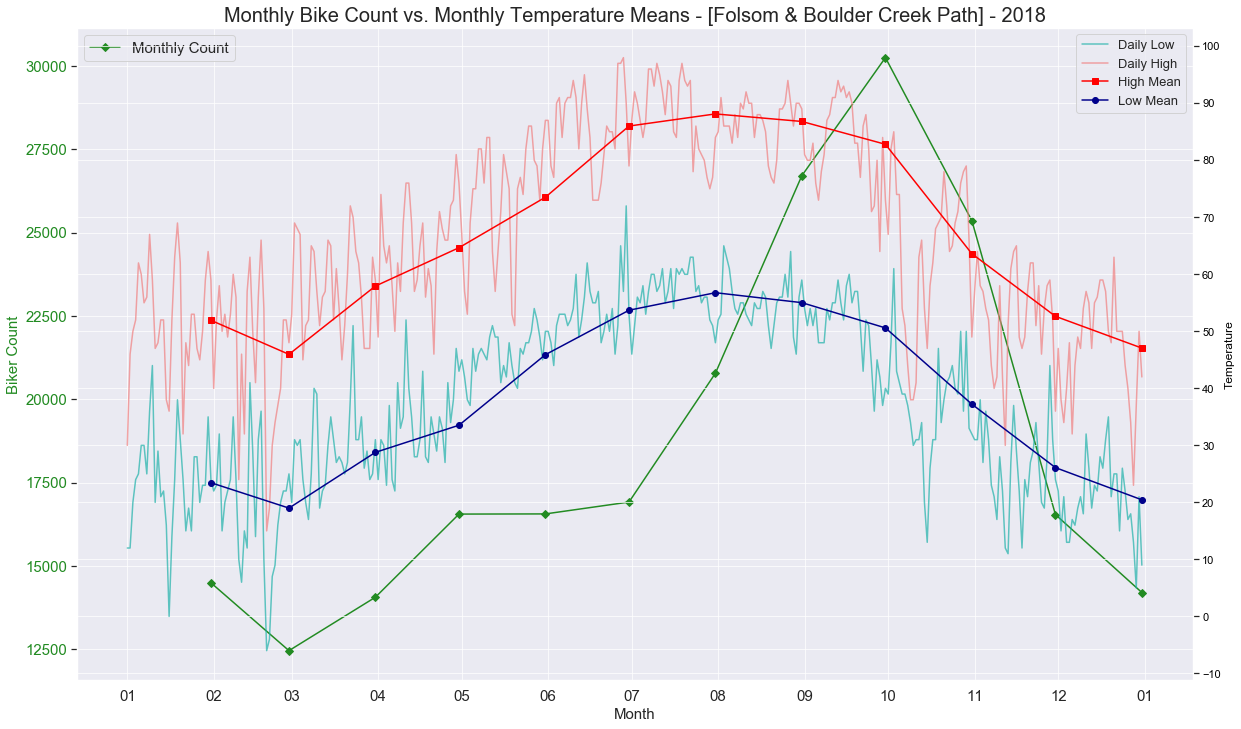

In [36]:
days_folsom_bouldercreek_2018 = days_folsom_bouldercreek.query('date.dt.year == 2018')
months_folsom_bouldercreek_2018 = months_folsom_bouldercreek.query('date.dt.year == 2018')

bike_color = 'forestgreen'

fig, ax1 = plt.subplots(figsize=(20, 12))

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_title('Monthly Bike Count vs. Monthly Temperature Means - [Folsom & Boulder Creek Path] - 2018', fontsize=20)
ax1.set_xlabel('Month', fontsize=15)
ax1.set_ylabel('Biker Count', fontsize=15, color=bike_color)

# ax1.plot(days_folsom_bouldercreek_2018['date'], days_folsom_bouldercreek_2018['total'], color=bike_color, alpha=0.7, label="Daily Count")
ax1.plot(months_folsom_bouldercreek_2018['date'], months_folsom_bouldercreek_2018['total'], color=bike_color, marker='D', label='Monthly Count')

ax1.tick_params(axis='y', labelcolor=bike_color)

##########
ax2 = ax1.twinx()

ax2.set_ylabel('Temperature', color='black')
ax2.plot(weather_2018['date'], weather_2018['tmin'], color='lightseagreen', alpha=0.7, label='Daily Low')
ax2.plot(weather_2018['date'], weather_2018['tmax'], color='lightcoral', alpha=0.7, label='Daily High')

ax2.plot(weather_months_2018['date'], weather_months_2018['tmax_mean'], label='High Mean', color='red', marker='s')
ax2.plot(weather_months_2018['date'], weather_months_2018['tmin_mean'], label='Low Mean', color='darkblue', marker='o')

ax2.tick_params(axis='y', labelcolor='black')

plt.yticks(np.arange(-10, 110, 10))

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
# ax1.xaxis.grid(True, which="minor")

ax1.legend(loc='upper left', prop={'size': 15})
ax2.legend(loc='upper right', prop={'size': 13})


plt.show()

#### Folsom & BoulderCreek Path - 2017

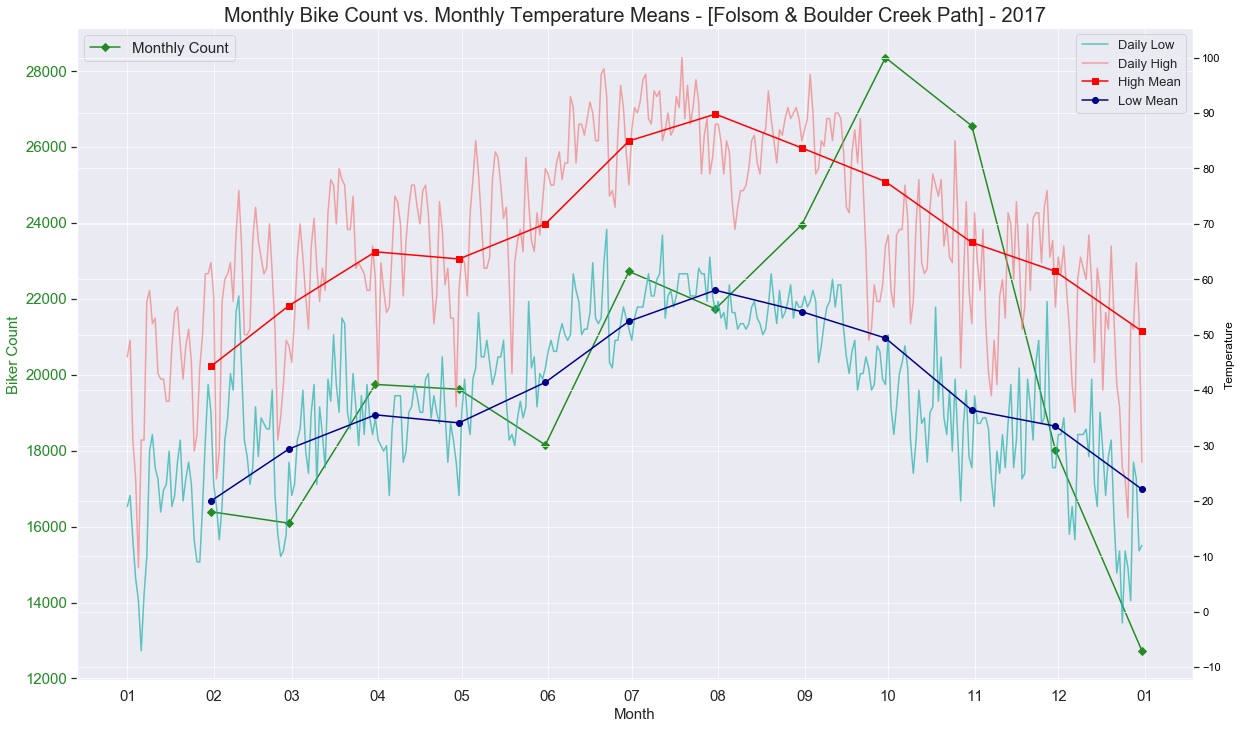

In [35]:
weather_2017 = df_weather.query('date.dt.year == 2017')
weather_months_2017 = weather_months.query('date.dt.year == 2017')
days_folsom_bouldercreek_2017 = days_folsom_bouldercreek.query('date.dt.year == 2017')
months_folsom_bouldercreek_2017 = months_folsom_bouldercreek.query('date.dt.year == 2017')

bike_color = 'forestgreen'

fig, ax1 = plt.subplots(figsize=(20, 12))

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_title('Monthly Bike Count vs. Monthly Temperature Means - [Folsom & Boulder Creek Path] - 2017', fontsize=20)
ax1.set_xlabel('Month', fontsize=15)
ax1.set_ylabel('Biker Count', fontsize=15, color=bike_color)

# ax1.plot(days_folsom_bouldercreek_2017['date'], days_folsom_bouldercreek_2017['total'], color=bike_color, alpha=0.7, label="Daily Count")
ax1.plot(months_folsom_bouldercreek_2017['date'], months_folsom_bouldercreek_2017['total'], color=bike_color, marker='D', label='Monthly Count')

ax1.tick_params(axis='y', labelcolor=bike_color)

ax2 = ax1.twinx()

ax2.set_ylabel('Temperature', color='black')
ax2.plot(weather_2017['date'], weather_2017['tmin'], color='lightseagreen', alpha=0.7, label='Daily Low')
ax2.plot(weather_2017['date'], weather_2017['tmax'], color='lightcoral', alpha=0.7, label='Daily High')

ax2.plot(weather_months_2017['date'], weather_months_2017['tmax_mean'], label='High Mean', color='red', marker='s')
ax2.plot(weather_months_2017['date'], weather_months_2017['tmin_mean'], label='Low Mean', color='darkblue', marker='o')

ax2.tick_params(axis='y', labelcolor='black')

plt.yticks(np.arange(-10, 110, 10))

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
# ax1.xaxis.grid(True, which="minor")

ax1.legend(loc='upper left', prop={'size': 15})
ax2.legend(loc='upper right', prop={'size': 13})

plt.show()

#### Folsom & BoulderCreek Path - 2016

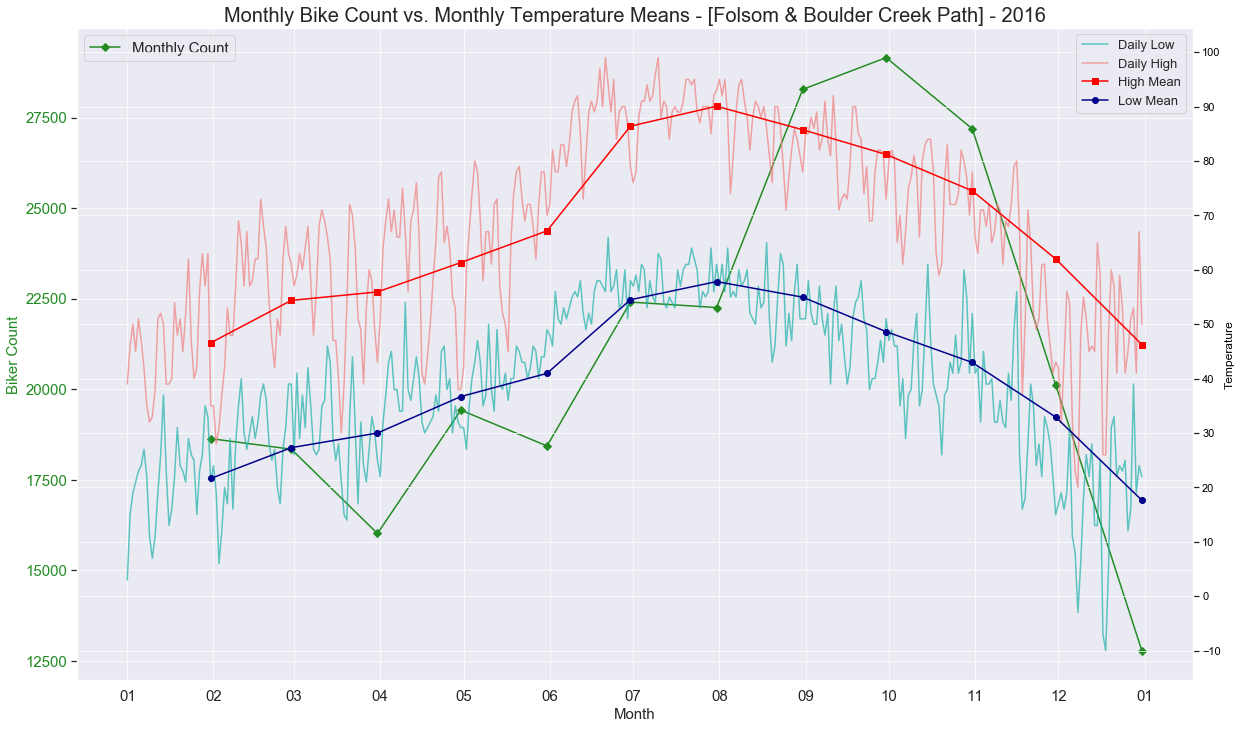

In [37]:
weather_2016 = df_weather.query('date.dt.year == 2016')
weather_months_2016 = weather_months.query('date.dt.year == 2016')
days_folsom_bouldercreek_2016 = days_folsom_bouldercreek.query('date.dt.year == 2016')
months_folsom_bouldercreek_2016 = months_folsom_bouldercreek.query('date.dt.year == 2016')

bike_color = 'forestgreen'

fig, ax1 = plt.subplots(figsize=(20, 12))

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_title('Monthly Bike Count vs. Monthly Temperature Means - [Folsom & Boulder Creek Path] - 2016', fontsize=20)
ax1.set_xlabel('Month', fontsize=15)
ax1.set_ylabel('Biker Count', fontsize=15, color=bike_color)

# ax1.plot(days_folsom_bouldercreek_2016['date'], days_folsom_bouldercreek_2016['total'], color=bike_color, alpha=0.7, label="Daily Count")
ax1.plot(months_folsom_bouldercreek_2016['date'], months_folsom_bouldercreek_2016['total'], color=bike_color, marker='D', label='Monthly Count')

ax1.tick_params(axis='y', labelcolor=bike_color)

ax2 = ax1.twinx()

ax2.set_ylabel('Temperature', color='black')
ax2.plot(weather_2016['date'], weather_2016['tmin'], color='lightseagreen', alpha=0.7, label='Daily Low')
ax2.plot(weather_2016['date'], weather_2016['tmax'], color='lightcoral', alpha=0.7, label='Daily High')

ax2.plot(weather_months_2016['date'], weather_months_2016['tmax_mean'], label='High Mean', color='red', marker='s')
ax2.plot(weather_months_2016['date'], weather_months_2016['tmin_mean'], label='Low Mean', color='darkblue', marker='o')

ax2.tick_params(axis='y', labelcolor='black')

plt.yticks(np.arange(-10, 110, 10))

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
# ax1.xaxis.grid(True, which="minor")

ax1.legend(loc='upper left', prop={'size': 15})
ax2.legend(loc='upper right', prop={'size': 13})

plt.show()

### Folsom & BoulderCreek Path Northbound vs. Southbound

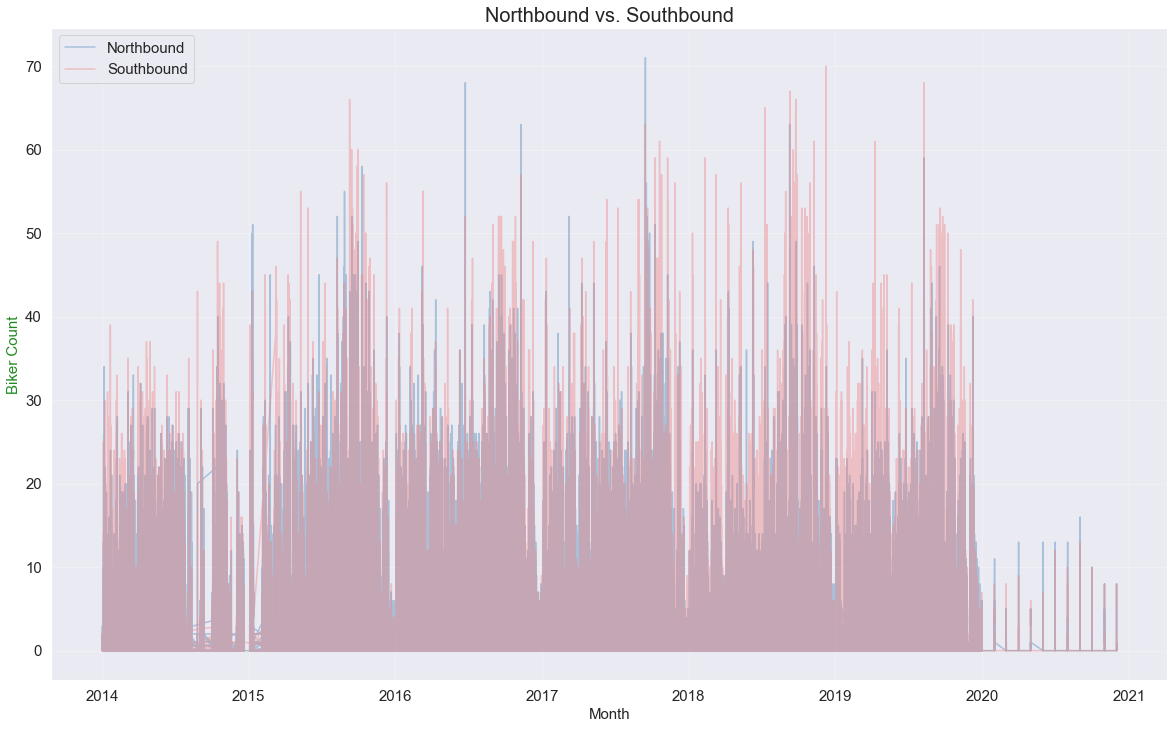

In [38]:
df_folsom_bouldercreek_short = df_folsom_bouldercreek.query('date.dt.year >= 2014')

fig, ax1 = plt.subplots(figsize=(20, 12))

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_title('Northbound vs. Southbound', fontsize=20)
ax1.set_xlabel('Month', fontsize=15)
ax1.set_ylabel('Biker Count', fontsize=15, color=bike_color)

ax1.plot(df_folsom_bouldercreek_short['date'], df_folsom_bouldercreek_short['nb'], color='steelblue', alpha=0.4, label='Northbound')
ax1.plot(df_folsom_bouldercreek_short['date'], df_folsom_bouldercreek_short['sb'], color='lightcoral', alpha=0.4, label='Southbound')

ax1.legend(loc='upper left', prop={'size': 15})
ax1.grid(alpha=0.25)


plt.show()

An initial rough graph seems to show a rather equal distribution for Northbound and Southbound traffic, with slightly more southbout. This will have to be explored further.

## Folsom & South Monthly Count

In [1]:
# # Monthly bike count @ Folsom & South split up by years
# months_folsom_south_2015 = months_folsom_south.query('date.dt.year == 2015')
# months_folsom_south_2016 = months_folsom_south.query('date.dt.year == 2016')
# months_folsom_south_2017 = months_folsom_south.query('date.dt.year == 2017')
# months_folsom_south_2018 = months_folsom_south.query('date.dt.year == 2018')

# # Constants for ease of customization
# color_2011 = 'crimson'
# color_2012 = 'slategray'
# color_2013 = 'firebrick'
# color_2014 = 'darkorange'
# color_2015 = 'royalblue'
# color_2016 = 'darkgreen'
# color_2017 = 'cyan'
# color_2018 = 'magenta'

# temp_alpha = 0.4

# # General Graph Initiaztion and Labels
# ##############################
# fig, ax1 = plt.subplots(figsize=(20, 12))

# ax1.tick_params(axis='both', which='major', labelsize=15)
# ax1.tick_params(axis='y', labelcolor='black')
# ax1.set_title('Monthly Bike Count - [Folsom & South St.]', fontsize=20)
# ax1.set_xlabel('Month', fontsize=15)
# ax1.set_ylabel('Monthly Biker Count', fontsize=15)
# ##############################

# # Biker data plots 2011-2018
# # Plot on the 2018 'date' x-axis for consitancy and graph overlap
# ##############################
# ax1.plot(months_folsom_south_2015['date'], months_folsom_south_2015['total'], color=color_2015, marker='o', label='2015')
# ax1.plot(months_folsom_south_2015['date'], months_folsom_south_2016['total'], color=color_2016, marker='o', label='2016')
# ax1.plot(months_folsom_south_2015['date'], months_folsom_south_2017['total'], color=color_2017, marker='o', label='2017')
# ax1.plot(months_folsom_south_2015['date'], months_folsom_south_2018['total'], color=color_2018, marker='o', label='2018')
# ##############################

# ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m'))


# ax1.legend(loc='upper left', prop={'size': 12})
# ax1.grid()

# plt.show()

## Folsom & Pine Monthly Count

In [2]:
# # Monthly bike count @ Folsom & South split up by years
# months_folsom_pine_2015 = months_folsom_pine.query('date.dt.year == 2015')
# months_folsom_pine_2016 = months_folsom_pine.query('date.dt.year == 2016')
# months_folsom_pine_2017 = months_folsom_pine.query('date.dt.year == 2017')
# months_folsom_pine_2018 = months_folsom_pine.query('date.dt.year == 2018')

# # Constants for ease of customization
# color_2011 = 'crimson'
# color_2012 = 'slategray'
# color_2013 = 'firebrick'
# color_2014 = 'darkorange'
# color_2015 = 'royalblue'
# color_2016 = 'darkgreen'
# color_2017 = 'cyan'
# color_2018 = 'magenta'

# temp_alpha = 0.4

# # General Graph Initiaztion and Labels
# ##############################
# fig, ax1 = plt.subplots(figsize=(20, 12))

# ax1.tick_params(axis='both', which='major', labelsize=15)
# ax1.tick_params(axis='y', labelcolor='black')
# ax1.set_title('Monthly Bike Count - [Folsom & Pine]', fontsize=20)
# ax1.set_xlabel('Month', fontsize=15)
# ax1.set_ylabel('Monthly Biker Count', fontsize=15)
# ##############################

# # Biker data plots 2011-2018
# # Plot on the 2018 'date' x-axis for consitancy and graph overlap
# ##############################
# ax1.plot(months_folsom_pine_2015['date'], months_folsom_pine_2015['total'], color=color_2015, marker='o', label='2015')
# ax1.plot(months_folsom_pine_2015['date'], months_folsom_pine_2016['total'], color=color_2016, marker='o', label='2016')
# ax1.plot(months_folsom_pine_2015['date'], months_folsom_pine_2017['total'], color=color_2017, marker='o', label='2017')
# ax1.plot(months_folsom_pine_2015['date'], months_folsom_pine_2018['total'], color=color_2018, marker='o', label='2018')
# ##############################

# ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m'))


# ax1.legend(loc='upper left', prop={'size': 12})
# ax1.grid()

# plt.show()